In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("6+1 before PCA.csv")
df

,1427.2869,1423.4293,1419.5719,1415.7144,1411.8568,1407.9993,1404.1417,1400.2842,1396.4266,1392.5691,...,933.5228,929.6653,925.8077,921.9502,918.0927,914.2351,910.3776,906.5201,902.6625,class
0,0.022179,0.009806,-0.065457,-0.099150,-0.095546,-0.082718,-0.064123,-0.041132,-0.026961,0.001175,...,0.000301,0.003282,0.005528,0.011743,0.020956,0.026893,0.021537,0.008566,0.000666,*NKG*
1,0.020870,0.006631,-0.071893,-0.106774,-0.097418,-0.078455,-0.057775,-0.039490,-0.029143,0.002803,...,0.000358,0.008145,0.009536,0.008358,0.015939,0.029121,0.027823,0.011042,0.000289,*NKG*
2,0.022588,0.004629,-0.067922,-0.090184,-0.089722,-0.084648,-0.066549,-0.038269,-0.014495,0.018981,...,0.006473,0.007327,0.009663,0.014073,0.018120,0.022319,0.020642,0.009328,0.000573,*NKG*
3,0.020435,0.006939,-0.058675,-0.088221,-0.094679,-0.087887,-0.067807,-0.037087,-0.012405,0.016493,...,0.005665,0.010465,0.011153,0.012487,0.019123,0.028242,0.025644,0.008967,-0.000653,*NKG*
4,0.016654,0.006748,-0.050935,-0.087695,-0.097994,-0.085774,-0.063599,-0.036366,-0.016946,0.009233,...,0.005085,0.010772,0.013180,0.014233,0.019341,0.026118,0.023500,0.010141,0.000618,*NKG*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.014691,-0.014107,-0.048739,-0.042652,-0.073789,-0.102873,-0.102725,-0.065669,-0.002239,0.055888,...,0.001763,0.013030,0.021201,0.029214,0.032053,0.029149,0.022565,0.011681,0.002000,*NKG*
236,0.018149,-0.004975,-0.040533,-0.020496,-0.031743,-0.060957,-0.072880,-0.060888,-0.023118,0.025549,...,0.007817,0.015360,0.020919,0.027062,0.032990,0.036748,0.033018,0.016008,0.001282,*NKG*
237,0.029507,0.007805,-0.044343,-0.032329,-0.057565,-0.099591,-0.120593,-0.104369,-0.045393,0.028300,...,-0.002808,0.007346,0.017625,0.025959,0.028892,0.028035,0.023501,0.011732,0.001352,*NKG*
238,0.031344,0.015938,-0.028141,-0.017108,-0.052799,-0.099399,-0.121457,-0.108310,-0.050034,0.025706,...,0.001368,0.013636,0.020027,0.025566,0.031371,0.032886,0.023576,0.008720,0.000667,*NKG*


In [3]:
df_drop=df.drop(labels=['class'],axis=1)
df_drop

,1427.2869,1423.4293,1419.5719,1415.7144,1411.8568,1407.9993,1404.1417,1400.2842,1396.4266,1392.5691,...,937.3803,933.5228,929.6653,925.8077,921.9502,918.0927,914.2351,910.3776,906.5201,902.6625
0,0.022179,0.009806,-0.065457,-0.099150,-0.095546,-0.082718,-0.064123,-0.041132,-0.026961,0.001175,...,-0.006208,0.000301,0.003282,0.005528,0.011743,0.020956,0.026893,0.021537,0.008566,0.000666
1,0.020870,0.006631,-0.071893,-0.106774,-0.097418,-0.078455,-0.057775,-0.039490,-0.029143,0.002803,...,-0.008118,0.000358,0.008145,0.009536,0.008358,0.015939,0.029121,0.027823,0.011042,0.000289
2,0.022588,0.004629,-0.067922,-0.090184,-0.089722,-0.084648,-0.066549,-0.038269,-0.014495,0.018981,...,0.001924,0.006473,0.007327,0.009663,0.014073,0.018120,0.022319,0.020642,0.009328,0.000573
3,0.020435,0.006939,-0.058675,-0.088221,-0.094679,-0.087887,-0.067807,-0.037087,-0.012405,0.016493,...,-0.002950,0.005665,0.010465,0.011153,0.012487,0.019123,0.028242,0.025644,0.008967,-0.000653
4,0.016654,0.006748,-0.050935,-0.087695,-0.097994,-0.085774,-0.063599,-0.036366,-0.016946,0.009233,...,-0.000709,0.005085,0.010772,0.013180,0.014233,0.019341,0.026118,0.023500,0.010141,0.000618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.014691,-0.014107,-0.048739,-0.042652,-0.073789,-0.102873,-0.102725,-0.065669,-0.002239,0.055888,...,-0.009585,0.001763,0.013030,0.021201,0.029214,0.032053,0.029149,0.022565,0.011681,0.002000
236,0.018149,-0.004975,-0.040533,-0.020496,-0.031743,-0.060957,-0.072880,-0.060888,-0.023118,0.025549,...,0.000390,0.007817,0.015360,0.020919,0.027062,0.032990,0.036748,0.033018,0.016008,0.001282
237,0.029507,0.007805,-0.044343,-0.032329,-0.057565,-0.099591,-0.120593,-0.104369,-0.045393,0.028300,...,-0.010859,-0.002808,0.007346,0.017625,0.025959,0.028892,0.028035,0.023501,0.011732,0.001352
238,0.031344,0.015938,-0.028141,-0.017108,-0.052799,-0.099399,-0.121457,-0.108310,-0.050034,0.025706,...,-0.012687,0.001368,0.013636,0.020027,0.025566,0.031371,0.032886,0.023576,0.008720,0.000667


In [4]:
cols = df_drop.columns.tolist()
cols

['1427.2869',
 '1423.4293',
 '1419.5719',
 '1415.7144',
 '1411.8568',
 '1407.9993',
 '1404.1417',
 '1400.2842',
 '1396.4266',
 '1392.5691',
 '1388.7115',
 '1384.854',
 '1380.9966',
 '1377.139',
 '1373.2815',
 '1369.424',
 '1365.5664',
 '1361.7089',
 '1357.8513',
 '1353.9938',
 '1350.1362',
 '1346.2787',
 '1342.4211',
 '1338.5637',
 '1334.7062',
 '1330.8486',
 '1326.9911',
 '1323.1335',
 '1319.276',
 '1315.4185',
 '1311.5609',
 '1307.7034',
 '1303.8458',
 '1299.9884',
 '1296.1309',
 '1292.2733',
 '1288.4158',
 '1284.5582',
 '1280.7007',
 '1276.8431',
 '1272.9856',
 '1269.1281',
 '1265.2705',
 '1261.4131',
 '1257.5555',
 '1253.698',
 '1249.8405',
 '1245.9829',
 '1242.1254',
 '1238.2678',
 '1234.4103',
 '1230.5527',
 '1226.6952',
 '1222.8376',
 '1218.9802',
 '1215.1227',
 '1211.2651',
 '1207.4076',
 '1203.55',
 '1199.6925',
 '1195.835',
 '1191.9774',
 '1188.1199',
 '1184.2623',
 '1180.4049',
 '1176.5474',
 '1172.6898',
 '1168.8323',
 '1164.9747',
 '1161.1172',
 '1157.2596',
 '1153.4021',


In [5]:
df_drop = df_drop.reindex(columns= cols)
X = df_drop.iloc[:,0:137].values
y = df_drop.iloc[:,0].values
X

array([[ 0.02217941,  0.00980571, -0.06545663, ...,  0.02153725,
         0.0085656 ,  0.00066576],
       [ 0.02087043,  0.00663141, -0.07189289, ...,  0.02782339,
         0.01104222,  0.00028854],
       [ 0.0225879 ,  0.00462858, -0.06792234, ...,  0.02064204,
         0.00932827,  0.00057292],
       ...,
       [ 0.02950669,  0.00780452, -0.04434335, ...,  0.02350115,
         0.01173227,  0.00135201],
       [ 0.03134396,  0.0159385 , -0.02814061, ...,  0.023576  ,
         0.0087201 ,  0.00066717],
       [ 0.03541336,  0.02814673, -0.01183236, ...,  0.0251202 ,
         0.01583103,  0.00469729]])

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [137] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


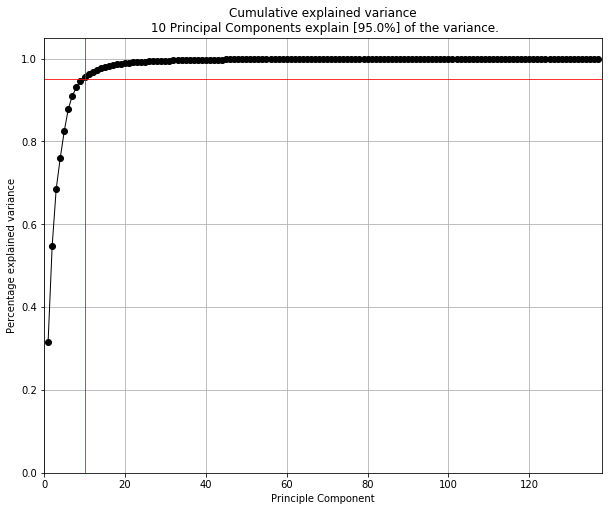

<Figure size 432x288 with 0 Axes>

In [6]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
#model = pca(n_components=2)

# Load example dataset
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
#X = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names, index=load_iris().target)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [137] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


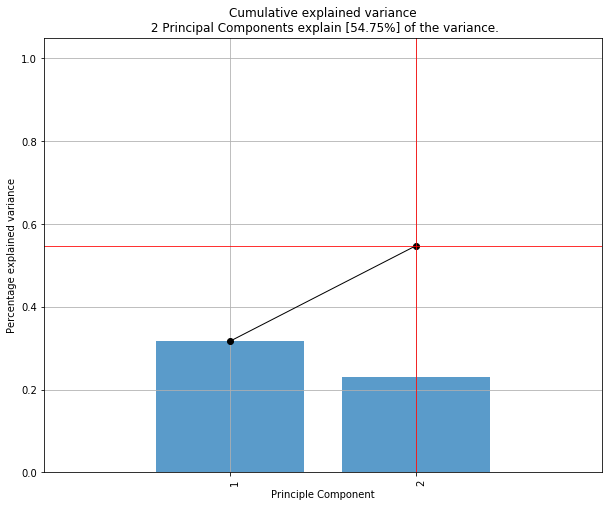

<Figure size 432x288 with 0 Axes>

In [7]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
#model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Load example dataset
import pandas as pd
import sklearn
# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

In [8]:
print(results)

{'loadings':             1         2         3         4         5         6         7  \
PC1  0.020891  0.060093  0.059428  0.028132 -0.010102 -0.021978 -0.003477   
PC2  0.072950  0.174745  0.112983  0.040421  0.036618  0.064696  0.082526   

            8         9        10  ...       128       129       130  \
PC1  0.039360  0.081060  0.083289  ... -0.002113 -0.001590 -0.009179   
PC2  0.068159 -0.000933 -0.078533  ...  0.041637  0.016712 -0.007613   

          131       132       133       134       135       136       137  
PC1 -0.013624 -0.011584 -0.009291 -0.014178 -0.022675 -0.026971 -0.010812  
PC2 -0.021021 -0.022536 -0.015150 -0.005653  0.000403 -0.001286 -0.001940  

[2 rows x 137 columns], 'PC':           PC1       PC2
1.0 -0.071925  0.009672
1.0 -0.075989 -0.023248
1.0 -0.064657  0.037516
1.0 -0.081869  0.077819
1.0 -0.108789  0.039242
..        ...       ...
1.0 -0.039857 -0.127521
1.0 -0.196158  0.087396
1.0 -0.051963 -0.097629
1.0 -0.064369 -0.082709
1.0 -0.050920 -

In [9]:
results = pd.DataFrame(results)
import seaborn as sns
sns.set(style="ticks")
#sns.pairplot(Y_sklearn, hue="PCs")
sns.pairplot(results)

ValueError: Shape of passed values is (137, 7), indices imply (2, 7)

## Second method

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv("6+1 before PCA.csv")

In [ ]:
X = df.drop('class', 1)
y = df['class']
X

In [ ]:
y

In [ ]:
from pca import pca
model = pca(n_components=10)

# Load example dataset
import sklearn
# Fit transform
PCA_results = model.fit_transform(X)
print(PCA_results)

In [ ]:
PCA_results

In [ ]:
PCA_results = pd.DataFrame(PCA_results)
sns.pairplot(PCA_results, hue="PC")